mybook_calc_mean_sd.ipynb

Marcello Chang

Created: 2/17/17

Last modified 2/19/17

Homework created to analyze gene expression dataset

In [2]:
#read in the genes.table file, store into a variable
genes <- read.table("genes.table", header=T)
#print out the first few rows of the table
head(genes)

geneA       geneB       geneC       geneD    
1  0.02963661 -0.15589774 0.777117756 0.9388822
2 -0.55914019  0.85740822 0.954383868 2.1267176
3 -0.06752349 -0.89062520 0.984139714 1.8573940
4 -0.28521811  0.65227021 0.002211166 1.8693943
5 -1.23289416  0.08631661 0.335854710 0.7509871
6 -0.19654932  0.03493783 0.052363658 3.6873830


	Shapiro-Wilk normality test

data:  geneA
W = 0.99603, p-value = 0.244



	Shapiro-Wilk normality test

data:  geneB
W = 0.99323, p-value = 0.02392



	Shapiro-Wilk normality test

data:  geneC
W = 0.95524, p-value = 3.544e-11



	Shapiro-Wilk normality test

data:  geneD
W = 0.90274, p-value < 2.2e-16


[1] "If we wanted to test for differences in expression between genes, we could use a variety of tests\nt-tests involve many assumptions. Specifically it assumes:\n    -Each of the two populations being compared should follow a normal distribution.\n    -The two populations being compared have the same variance\n    -The data are sampled independently from the two populations being compared\nIf these assumptions do not hold they may be somewhat compensated by other factors such as having the same size samples \nfor both populations however usually it is better to instead use other less powerful tests.\nAlternatives to the t-test include the Mann–Whitney–Wilcoxon test (for two independent samples), Slutsky's theorem, or Welch's t-test.\nThese all involve different assumptions. The Mann–Whitney–Wilcoxon test in particular does not assume a normal distribution."

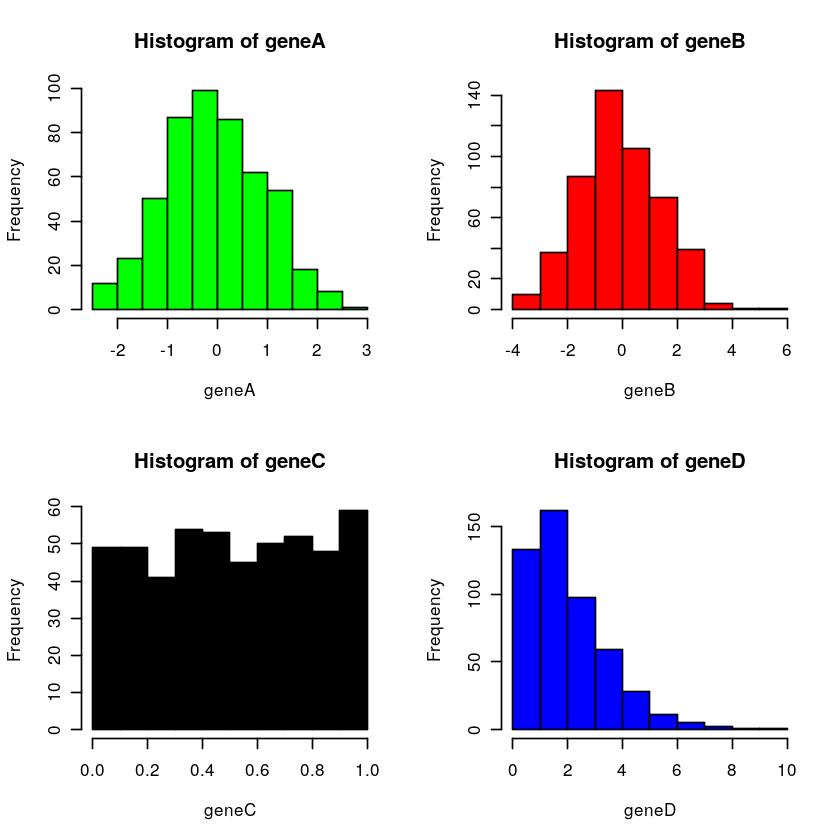

In [3]:
#plot the distribution of abundance for each gene
attach(genes)
par(mfrow = c(2,2))

hist(geneA, col="green")
hist(geneB, col="red")
hist(geneC, col="black")
hist(geneD, col="blue")

#What you observe from these plots?
shapiro.test(geneA)
#A: Looks normally distributed but for more accurate analysis we use the Shapiro test.
#The shapiro test gave a p-value = 0.244, since this is above our alpha of 0.0001 (0.05/500 from the Bonferroni correction)
#we accept the null hypothesis that this data is normally distributed
shapiro.test(geneB)
#B: Looks normally distributed slightly skewed to the right but for more accurate analysis we use the Shapiro test.
#The shapiro test gave a p-value = 0.02392, since this is above our alpha of 0.0001 (0.05/500 from the Bonferroni correction)
#we accept the null hypothesis that this data is normally distributed
shapiro.test(geneC)
#C: Looks like a roughly uniform distribution but for more accurate analysis we use the Shapiro test.
#The shapiro test gave a p-value = 3.544e-11, since this is below our alpha of 0.0001 (0.05/500 from the Bonferroni correction)
#we reject the null hypothesis that this data is normally distributed and conclude the data is not normally distributed.
shapiro.test(geneD)
#D: Looks normally distributed highly skewed to the right but for more accurate analysis we use the Shapiro test.
#The shapiro test gave a p-value < 2.2e-16, since this is below our alpha of 0.0001 (0.05/500 from the Bonferroni correction)
#we reject the null hypothesis that this data is normally distributed and conclude the data is not normally distributed.

#Qualitatively B and D seem to have highest the peaks, A's peak is a little bit lower, and C has the lowest peaks.
#However C has a wider uniform distribution though so it doesn't actually have fewer data points (they all have about 500 data points)

"If we wanted to test for differences in expression between genes, we could use a variety of tests
t-tests involve many assumptions. Specifically it assumes:
    -Each of the two populations being compared should follow a normal distribution.
    -The two populations being compared have the same variance
    -The data are sampled independently from the two populations being compared
If these assumptions do not hold they may be somewhat compensated by other factors such as having the same size samples 
for both populations however usually it is better to instead use other less powerful tests.
Alternatives to the t-test include the Mann–Whitney–Wilcoxon test (for two independent samples), Slutsky's theorem, or Welch's t-test.
These all involve different assumptions. The Mann–Whitney–Wilcoxon test in particular does not assume a normal distribution."

In [4]:
#Create a new cell, Use the approprite statistical test to compare the expression patterns of the following pairs

#We use a t.test when both populations are normally distributed data and a wilcox.test otherwise. 
#Thus (based on above) we use a t.test for when comparing genes A and B and wilcox.test for all other combinations

t.test(geneA, geneB) 
#Both geneA and geneB are normally distributed so use the t.test
#t-test p-value = 0.8399. Since this is far above our alpha of 0.0001 (Bonferroni) we accept the null hypothesis that the true location 
#shift is equal to 0 so we cannot conclude the genes have different expression.

wilcox.test(geneA, geneC)
#GeneC is not normally distributed so use the Wilcoxon test
#Wilcoxon rank sum test p-value < 2.2e-16. Since this is far below our usual alpha of 0.0001 (Bonferroni) we reject the null hypothesis that 
#the true location shift is equal to 0 and accept the alternative hypothesis that the true location shift is not equal to 0 and we can
#conclude the genes have different expression.

wilcox.test(geneB, geneC)
#GeneC is not normally distributed so use the Wilcoxon test
#Wilcoxon rank sum test p-value < 2.2e-16. Since this is far below our usual alpha of 0.0001 (Bonferroni) we reject the null hypothesis that 
#the true location shift is equal to 0 and accept the alternative hypothesis that the true location shift is not equal to 0 and we can
#conclude the genes have different expression.

wilcox.test(geneB, geneD)
#GeneD is not normally distributed so use the Wilcoxon test
#Wilcoxon rank sum test p-value < 2.2e-16. Since this is far below our usual alpha of 0.0001 (Bonferroni) we reject the null hypothesis that 
#the true location shift is equal to 0 and accept the alternative hypothesis that the true location shift is not equal to 0 and we can
#conclude the genes have different expression.


	Welch Two Sample t-test

data:  geneA and geneB
t = 0.20203, df = 876.75, p-value = 0.8399
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1386207  0.1704329
sample estimates:
  mean of x   mean of y 
-0.06278609 -0.07869219 



	Wilcoxon rank sum test with continuity correction

data:  geneA and geneC
W = 73274, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  geneB and geneC
W = 85865, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  geneB and geneD
W = 36393, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [5]:
sessionInfo()

R version 3.2.4 Revised (2016-03-16 r70336)
Platform: x86_64-pc-linux-gnu (64-bit)

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.0           magrittr_1.5       IRdisplay_0.4.9000 pbdZMQ_0.2-5      
 [5] tools_3.2.4        crayon_1.3.2       uuid_0.1-2         stringi_1.1.2     
 [9] IRkernel_0.7.1     jsonlite_1.2       stringr_1.1.0      digest_0.6.11     
[13] Cairo_1.5-9        repr_0.10.9000     evaluate_0.10     